In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [6]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [8]:
x_train,x_test=x_train/255.0,x_test/255.0


In [10]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)


In [20]:
model=keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')])

In [26]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [28]:
hist=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7792 - loss: 0.6110 - val_accuracy: 0.8751 - val_loss: 0.3504
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8846 - loss: 0.3149 - val_accuracy: 0.8826 - val_loss: 0.3223
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9054 - loss: 0.2601 - val_accuracy: 0.9078 - val_loss: 0.2594
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9186 - loss: 0.2209 - val_accuracy: 0.9089 - val_loss: 0.2561
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9295 - loss: 0.1907 - val_accuracy: 0.9114 - val_loss: 0.2442
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9369 - loss: 0.1685 - val_accuracy: 0.9070 - val_loss: 0.2641
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9452 - loss: 0.1465 - val_accuracy: 0.9147 - val_loss: 0.2450
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9516 - loss

In [30]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('\n Test accuracy:',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9118 - loss: 0.3112

 Test accuracy: 0.9135000109672546


In [32]:
predictions=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [40]:
def plot_image(index):
    plt.imshow(x_test[index].reshape(28,28),cmap='gray')
    plt.title(f'predicted:{np.argmax(predictions[index])}| Actucal:{y_test[index]}')
    plt.show()

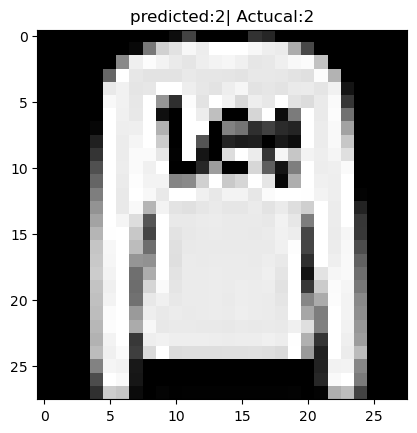

In [44]:
plot_image(1)